### 导入库

In [1]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import jieba

### 设置文件路径（采用绝对路径）

In [2]:
path_text = 'D:/tempRes/texts/2022政府工作报告.txt'
path_stop = 'D:/tempRes/stopwords/hit_stopwords.txt'
path_mask = 'D:/tempRes/mask/ChinaMap.png'
path_font = 'D:/tempRes/fonts/msyh.ttc'

### 查看词云

In [3]:
def plt_imshow(x, ax=None, show=True):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(x)
    ax.axis("off")
    if show: plt.show()
    return ax

### 文本读取

In [4]:
text = open(path_text, encoding='utf8').read()
STOPWORDS_CH = open(path_stop, encoding='utf8').read().split()

### 分词和过滤
    首先用 `jieba.cut(text)` 函数将字符串 `text` 分割成一个个词或词组 (该函数返回的是一个'生成器 `generator`), 然后对里面的每一个词, 过滤掉没有意义的 '停用词' (`w not in STOPWORDS_CH`), 最后只保留长度大于1的词组 (`len(w) > 1`).

In [8]:
word_list = [
        w for w in jieba.cut(text) 
        if w not in STOPWORDS_CH and len(w) > 1
        ]
freq = count_frequencies(word_list)

In [17]:
# 利用 `pandas.value_count()` 函数来计算
# import pandas as pd
# freq = pd.value_counts(word_list).to_dict()

In [11]:
# 图片处理
im_mask = np.array(Image.open(path_mask))
# im_colors = ImageColorGenerator(im_mask) # 重新着色

### 统计词频

In [7]:
def count_frequencies(word_list):
    freq = dict()
    for w in word_list:
        if w not in freq.keys():
            freq[w] = 1
        else:
            freq[w] += 1
    return freq
freq = count_frequencies(word_list)

### 制作并画出词云

In [12]:
# 建立词云对象
wcd = WordCloud(font_path=path_font,width = 1000, height = 700,
                    background_color='white',max_words=200, max_font_size=150,
                    mode="RGBA", 
                    colormap="Reds",
                    mask=im_mask,
#                     contour_width=6,
#                     contour_color="red"               
                    )
wcd.generate_from_frequencies(freq)
#wcd.recolor(color_func = im_colors)

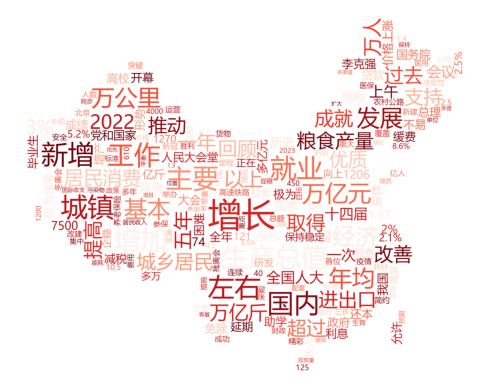

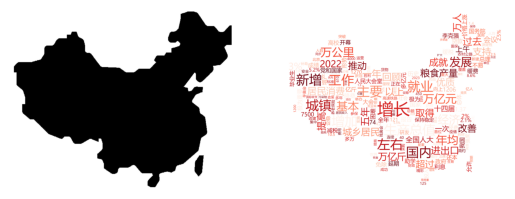

In [13]:
# 查看词云
ax = plt_imshow(wcd)
ax.figure.savefig(f'2022政府工作报告_wcd.png', bbox_inches='tight', dpi=150)
fig, axs = plt.subplots(1, 2)
plt_imshow(im_mask, axs[0], show=False)
plt_imshow(wcd, axs[1])
fig.savefig(f'2022政府工作报告.png', bbox_inches='tight', dpi=150)